# Pymaceuticals Inc.
---

This study tested 10 different drug regimens on 248 mice, intending to begin to screen for potential treatments for squamous cell carcinoma (SCC). The main objective is to evaluate the tumor volume over time. 
This group of mice was composed of 51% of males and 49% of females, and also there was a Placebo group to compare results. 

It is possible to identify that Ramicane and Capomulin work better in reducing the tumor volume, respectively, and both drugs showed the smallest variation in final tumor volume. 
Ketapril is the least effective treatment, analyzing the same parameters.

There is a strong positive correlation (Pearson correlation coefficient (r) = 0.84) between the weight of the mice and their respective tumor volumes. If the weight increases, the average tumor volume follows. 
Finally, the best model that describes these results is y = 0.95x + 21.55, where y is the tumor volume, and x is the weight of the mice, representing 84% of the cases.
 

In [250]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_df = pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
complete_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [251]:
# Checking the number of mice.
miceID_list = complete_df["Mouse ID"].unique()
miceID_count = complete_df["Mouse ID"].nunique()
miceID_count

249

In [257]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID NUMBER that shows up for Mouse ID and Timepoint. 

dup_mouse_df = complete_df.loc[complete_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

print(len(dup_mouse_df))
print(dup_mouse_df)

1
['g989']


In [262]:
# Optional: Get ALL the data for the duplicate mouse ID. 
duplicate_mouse_df = complete_df.loc[complete_df["Mouse ID"] == "g989"]

print("Number of duplicates: ", len(duplicate_mouse_df))
duplicate_mouse_df

Number of duplicates:  13


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [298]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = complete_df[complete_df["Mouse ID"] !="g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [265]:
# Checking the number of mice in the clean DataFrame.
clean_df["Mouse ID"].value_counts()

Mouse ID
k403    10
o287    10
j984    10
k210    10
k382    10
        ..
h428     1
o848     1
t573     1
d133     1
x226     1
Name: count, Length: 248, dtype: int64

In [266]:
# Original df = 249 mouses, cleaned = 248 ; 1 duplicated mouse was removed (g989)

In [267]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [151]:
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the TUMOR VOLUME for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

regimen_mean_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
regimen_median_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
regimen_var_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
regimen_std_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
regimen_sem_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_stat = pd.DataFrame({"Mean Tumor Volume": regimen_mean_df,
                            "Median Tumor Volume": regimen_median_df,
                            "Tumor Volume Variance":regimen_var_df,
                            "Tumor Volume Std. Dev.": regimen_std_df,
                            "Tumor Volume Std. Err.": regimen_sem_df})

summary_stat

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [152]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
# .agg(['mean', 'median', 'var', 'std', 'sem']) 
summary_agg = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [153]:
#Using .describe()
grouped_df = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].describe()
grouped_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

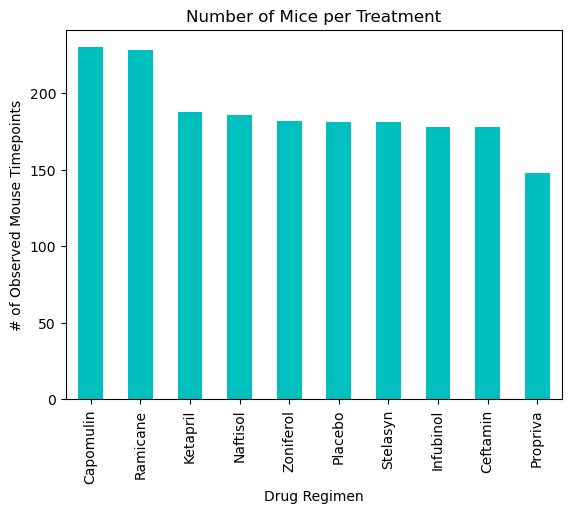

In [297]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

## This is the clean_df already

count_mouse = clean_df["Drug Regimen"].value_counts()
chart1_pandas = count_mouse.plot.bar(color='c') 


plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

#print(count_mouse)

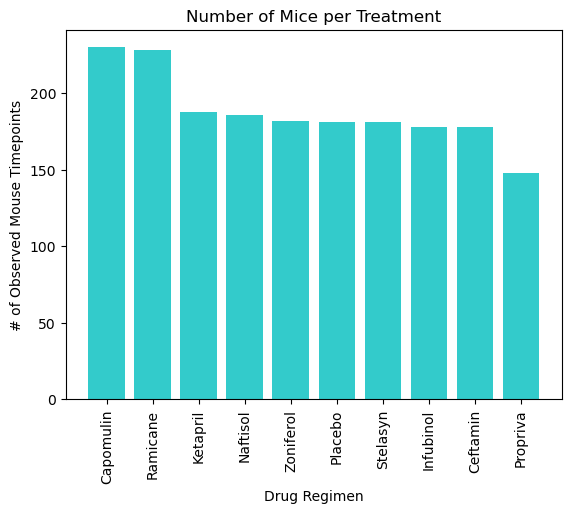

In [296]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = count_mouse.index.values
y_axis = count_mouse.values

# Create a Pyplot bar plot based off of the group series from before and label the title

plt.bar(x_axis, y_axis, color='c', alpha=0.8, align='center')

plt.title("Number of Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()

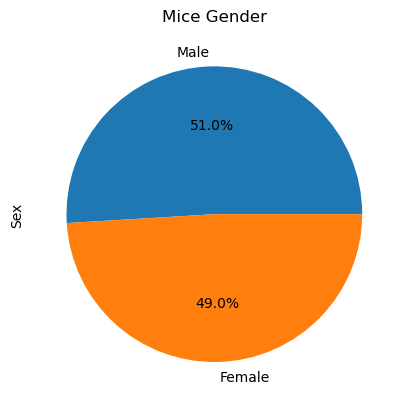

In [156]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#gender_df = clean_df["Sex"].value_counts()/len(clean_df["Sex"])
gender_df =clean_df["Sex"].value_counts()
pie_pandas = gender_df.plot.pie(autopct= "%1.1f%%")
plt.title('Mice Gender')
plt.ylabel('Sex')
plt.show()

Text(0, 0.5, 'Sex')

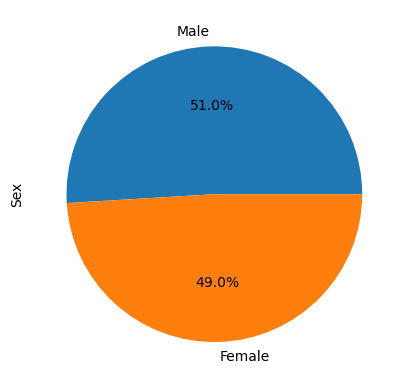

In [273]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']
plt.pie(gender_df, labels=labels, autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [278]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Filter: Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin",:]

merged_drugs = pd.concat([Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df], axis =0)

# Start by getting the last (greatest) timepoint for each mouse

max_Capomulin_df = Capomulin_df.groupby(["Mouse ID"])["Timepoint"].max()
max_Ramicane_df = Ramicane_df.groupby(["Mouse ID"])["Timepoint"].max()
max_Infubinol_df = Infubinol_df.groupby(["Mouse ID"])["Timepoint"].max()
max_Ceftamin_df = Ceftamin_df.groupby(["Mouse ID"])["Timepoint"].max()
                            
merged_max_df = pd.concat([max_Capomulin_df,max_Ramicane_df,max_Infubinol_df,max_Ceftamin_df], axis=0)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_drugs_max = pd.merge(merged_drugs, merged_max_df, on= ["Mouse ID", "Timepoint"])
merged_drugs_max

#Creating the final dataframe

final_tumor_volume = merged_drugs_max[["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)"]]

In [277]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset
for drug in treatment:
    volume = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_volume.append(volume)
    #print(tumor_volume)
    
    quartile = volume.quantile([0.25,0.5,0.75])
    lower = quartile[0.25]
    upper = quartile[0.75]
    iqr = upper - lower
    print(f"{drug}'s Quartiles & Outliers")
    print(f"The lower quartile of Tumor Volumes: {lower}")
    print(f"The upper quartile of Tumor Volumes: {upper}")
    print(f"The interquartile range Tumor Volumes: {iqr}\n")
     
    # Determine outliers using upper and lower bounds
    low_bound = lower - (1.5*iqr)
    up_bound = upper + (1.5*iqr)
    outliers = volume.loc[(volume > up_bound) | (volume < low_bound)]
    if len(outliers) > 0:
        print(f"{drug}'s potential outliers: {outliers}.\n")


Capomulin's Quartiles & Outliers
The lower quartile of Tumor Volumes: 32.37735684
The upper quartile of Tumor Volumes: 40.1592203
The interquartile range Tumor Volumes: 7.781863460000004

Ramicane's Quartiles & Outliers
The lower quartile of Tumor Volumes: 31.56046955
The upper quartile of Tumor Volumes: 40.65900627
The interquartile range Tumor Volumes: 9.098536719999998

Infubinol's Quartiles & Outliers
The lower quartile of Tumor Volumes: 54.04860769
The upper quartile of Tumor Volumes: 65.52574285
The interquartile range Tumor Volumes: 11.477135160000003

Infubinol's potential outliers: 55    36.321346
Name: Tumor Volume (mm3), dtype: float64.

Ceftamin's Quartiles & Outliers
The lower quartile of Tumor Volumes: 48.72207785
The upper quartile of Tumor Volumes: 64.29983003
The interquartile range Tumor Volumes: 15.577752179999997



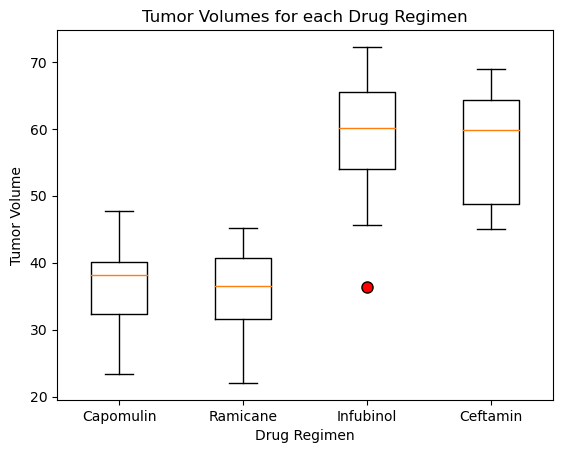

In [294]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

plt.boxplot(tumor_volume, labels = treatment, flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markersize': 8})
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume")
plt.title("Tumor Volumes for each Drug Regimen")
plt.show()

## Line and Scatter Plots

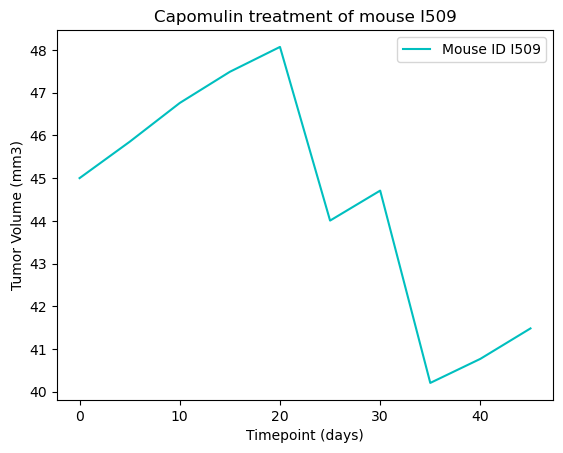

In [290]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Mouse_l509 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509"]

#Create Line Plot
x = Mouse_l509["Timepoint"]
y = Mouse_l509["Tumor Volume (mm3)"]

plt.plot(x, y, color="c",label="Mouse ID I509")
plt.legend(loc="best")
plt.title("Capomulin treatment of mouse I509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()   


Text(0, 0.5, 'Average Tumor Volume (mm3)')

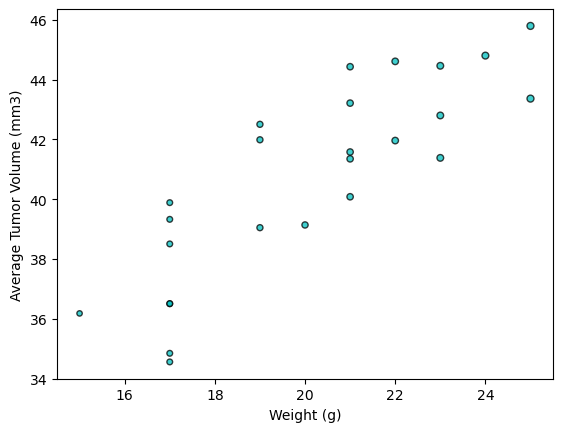

In [291]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

#Getting the df grouped by mouse ID
capomulin_mice = Capomulin_df.groupby("Mouse ID")

#variables to hold column data x and y axis

weight = capomulin_mice["Weight (g)"].mean()
tvolume = capomulin_mice["Tumor Volume (mm3)"].mean()


# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#create scatter plot
plt.scatter(weight, tvolume, marker="o", facecolors="c", edgecolors="black",s=x_values, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume 0.84


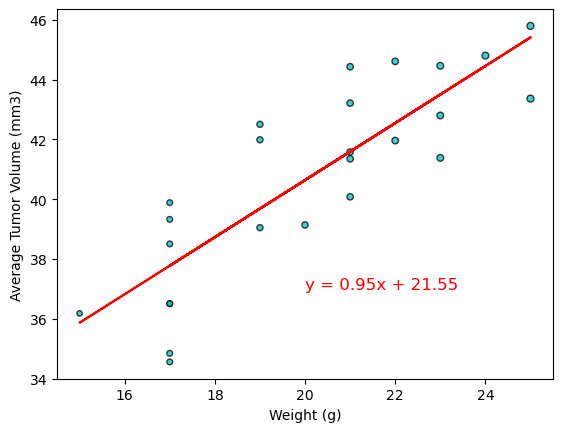

In [300]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume 
#for the entire Capomulin regimen

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tvolume)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot line
plt.plot(weight, regress_values, "-r")
plt.annotate(line_eq,(20,37), fontsize=12,color="red")
plt.scatter(weight, tvolume, marker="o", facecolors="c", edgecolors="black",s=x_values, alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

#print correlation coefficient
print(f"The correlation between mouse weight and the average tumor volume {round(st.pearsonr(weight,tvolume)[0],2)}")